For which year (2017 or 2018) do you want to run the grapher? 2018
Do you want to run the tests for peak or offpeak data? offpeak
At which tolerance do you want to run the grapher? .001


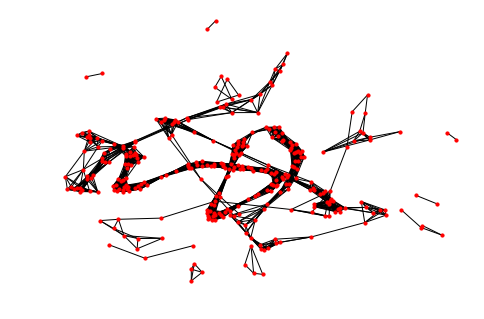

Graph details written to grapher-reports folder.
The number of connected components is  12 If this number is large, you may wish to abort component drawing.
Do you wish to abort component drawing (y/n)? n


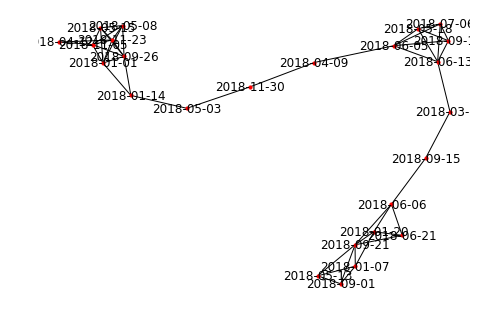

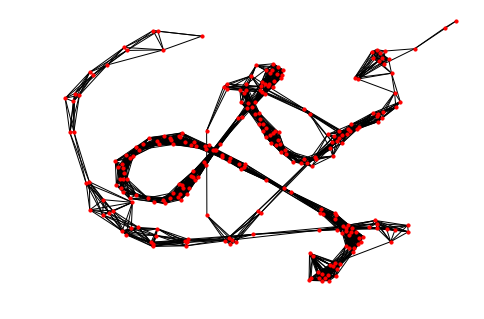

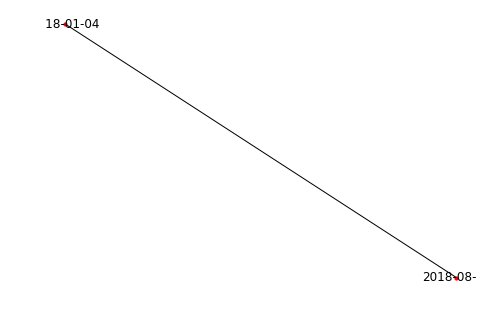

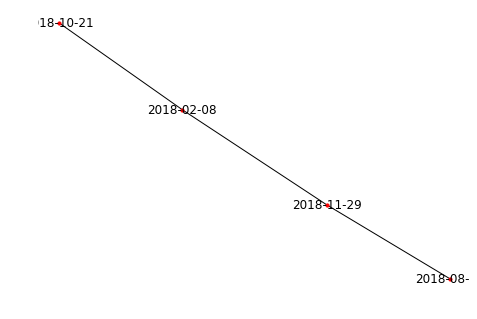

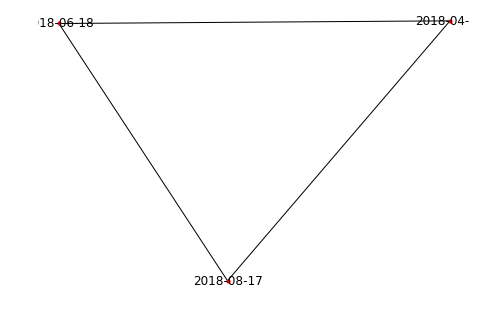

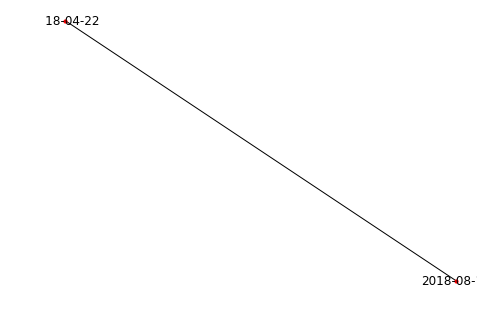

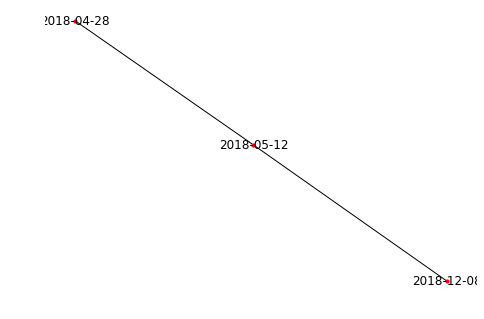

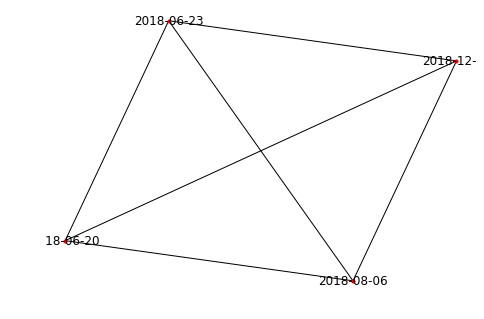

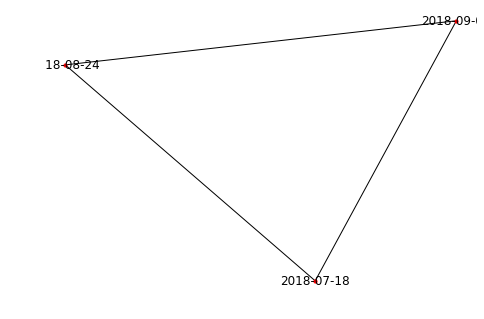

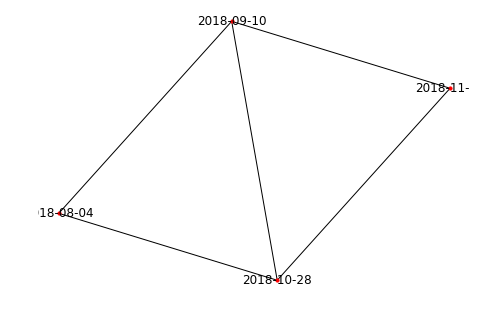

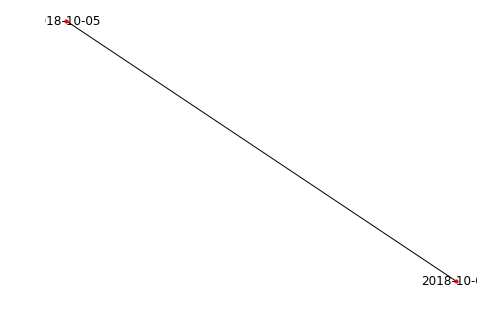

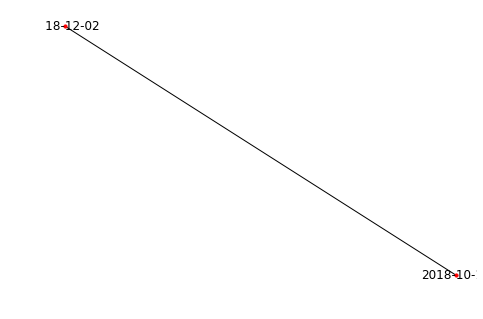

Components successfully drawn. See grapher-outputs folder.


In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def graph_build(graph,filelable):
    fig1=plt.figure()
    pos = nx.spring_layout(graph,k=0.07,iterations=20)
    X=False
    if len(graph)<=50:
        X=True
    nx.draw(graph, pos, node_size=10,with_labels=X)
    plt.show()
    fig1.savefig("grapher-output/"+filelable+".pdf")
    
    
    
def components(graph,dataframe):
    components=[]
    nodesets=[]
    for i in range(len(dataframe)):
        date=str(dataframe.loc[i,'date'])
        if date in list(graph):
            H=nx.node_connected_component(graph,date)
            G=graph.subgraph(H)
            if H not in nodesets:
                nodesets.append(H)
                components.append(G)
    return components


def statswriter(components,t,tod,year):
    outfile=open("grapher-reports/"+tod+"-"+str(year)+"-"+str(t)+".txt",'w',)
    outfile.write("This report is for a run of the grapher on the "+tod+"-"+str(year)+" data set with graph tolerance "+str(t)+".\n\n")
    outfile.write("Number of connected components: "+str(len(components))+".\n\n")
    comp=""
    for c in components:
        x=c.order()
        comp=comp+" "+str(x)
         
    outfile.write("Sizes of components:"+comp+".\n\n")
    
    outfile.close()
    
def main_loop(t,tod,year):
    filename="clean-files-"+str(year)+"/"+tod+"-"+str(year)+".csv"
    dff=pd.read_csv(filename)
    F=[]
    T=[]
    for i in range(len(dff)):
        for j in range(len(dff)):
            if j!=i:
                if abs(dff.loc[j,'ontime']-dff.loc[i,'ontime'])<=t:
                    F.append(str(dff.loc[i,'date']))
                    T.append(str(dff.loc[j,'date']))
    
    df = pd.DataFrame({ 'from':F, 'to':T}) #dataframe giving edges
    
    G=nx.from_pandas_edgelist(df, 'from', 'to') #make graph from data fram.
    name=str(year)+"/"+tod+"-"+str(year)+"-"+str(t)+"-all-components"
    graph_build(G,name)
    X=components(G,dff)
    statswriter(X,t,tod,year)
    print("Graph details written to grapher-reports folder.")
    print("The number of connected components is ",len(X),"If this number is large, you may wish to abort component drawing.")
    query=input("Do you wish to abort component drawing (y/n)? ")
    if query=='n':
        i=0
        for comp in X:
            name=str(year)+"/"+tod+"-"+str(year)+"-"+str(t)+"-component-"+str(i)
            i+=1
            graph_build(comp,name)
        print("Components successfully drawn. See grapher-outputs folder.")
    else:
        print("Component drawing aborted.")
    
    

if __name__ == '__main__':
    year=input("For which year (2017 or 2018) do you want to run the grapher? ") #ask for year input
    tod=input("Do you want to run the tests for peak or offpeak data? ")
    t=input("At which tolerance do you want to run the grapher? " )
    t=float(t)
    main_loop(t,tod,year)